In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
root = 'image_data/problem_chip.png'

paths = [
    'image_data/rgb_chip_spoof_1.png',
    'image_data/rgb_chip_spoof_2.png',
    'image_data/rgb_chip_spoof_3.png',
    'image_data/rgb_chip_spoof_4.png',
    'image_data/rgb_chip_spoof_5.png',
    'image_data/rgb_chip_spoof_6.png',
    'image_data/rgb_chip_spoof_7.png',
    'image_data/rgb_chip_spoof_8.png',
    'image_data/rgb_chip_spoof_9.png',
    'image_data/rgb_chip_spoof_10.png',
    'image_data/rgb_chip_spoof_11.png',
    'image_data/rgb_chip_spoof_12.png',
    'image_data/rgb_chip_spoof_13.png'
]

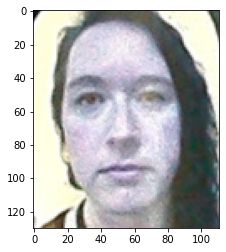

In [3]:
problem = cv2.imread(root)
chip = cv2.imread(root)
plt.imshow(problem)
images = []
for p in paths:
    images.append(cv2.imread(p))

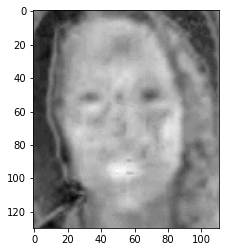

In [4]:
problem = cv2.cvtColor(problem, cv2.COLOR_BGR2YCrCb)[:, :, 1]
plt.imshow(problem, cmap='gray')
chromas = []
for i in images:
    chromas.append(cv2.cvtColor(i, cv2.COLOR_BGR2YCrCb)[:, :, 1])

In [5]:
def compute_hist(img, nbins):
    hist = np.zeros(shape=(nbins))
    flat_img = img.ravel()
    for i in range(0, flat_img.shape[0]):
        hist[flat_img[i]] += 1
    return hist

def smooth_out(hist, window_size=10):
    kernel = np.ones(shape=(2 * window_size))
    for i in range(0, hist.shape[0]):
        summation = 0.0
        count = 0
        for j in range(-window_size, window_size):
            idx = i + j
            if idx < 0 or idx > hist.shape[0] - window_size:
                continue
            summation += kernel[j] * hist[i + j]
            count += 1
        hist[i] = summation // count
    return hist

def compute_hists_from(imgs):
    hists = []
    for img in imgs:
        hists.append(smooth_out(compute_hist(img, 256)))
    return hists

def overlay_hists(anchor, hists):
    plt.plot(anchor, color='red')
    for hist in hists:
        plt.plot(hist, color='yellow')
    plt.show()

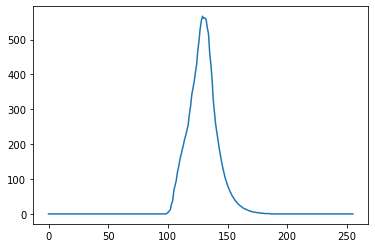

In [6]:
problem = smooth_out(compute_hist(problem, 256))
plt.plot(problem)

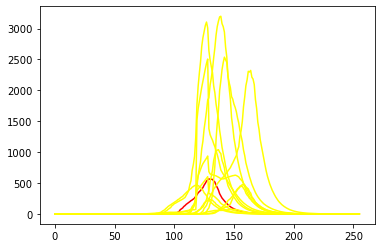

In [7]:
overlay_hists(problem, compute_hists_from(chromas))

In [8]:
# Note: I' = (I / 255)^gamma * 255
def adjust_exposure(img, gamma):
    table = np.empty((1,256), np.uint8)
    for idx in range(256):
        table[0, idx] = np.clip(pow(idx / 255.0, gamma) * 255.0, 0, 255)
    return cv2.LUT(img, table)
# Load the problem image: expose low, medium, high
# Compute histograms of chroma and saturation and compare how these vary

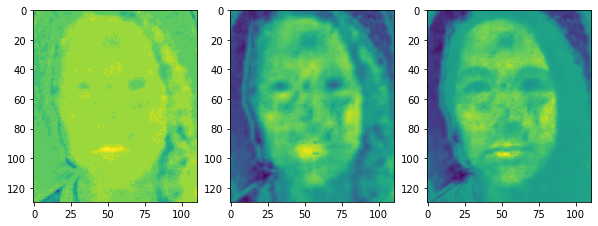

In [9]:
low = adjust_exposure(chip, 0.1)
medium = adjust_exposure(chip, 1.0)
high = adjust_exposure(chip, 3.0)

low = cv2.cvtColor(low, cv2.COLOR_BGR2YCrCb)[:, :, 1]
medium = cv2.cvtColor(medium, cv2.COLOR_BGR2YCrCb)[:, :, 1]
high = cv2.cvtColor(high, cv2.COLOR_BGR2YCrCb)[:, :, 1]

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(low)
ax[1].imshow(medium)
ax[2].imshow(high)
plt.show()

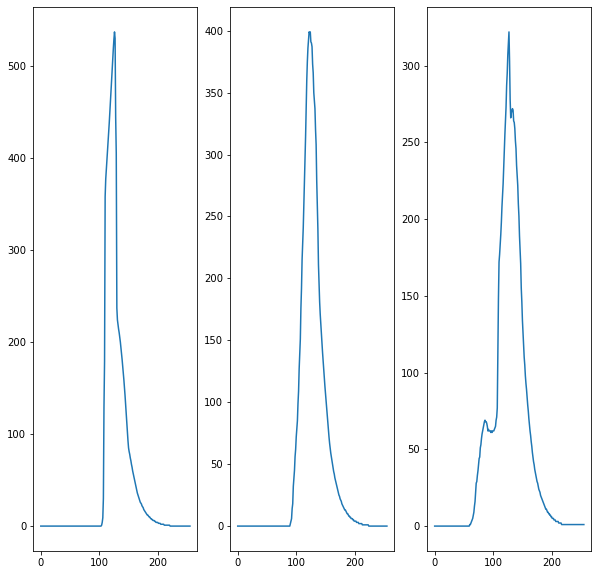

In [10]:
lowh = smooth_out(compute_hist(low, 256), window_size=20)
mediumh = smooth_out(compute_hist(medium, 256), window_size=20)
highh = smooth_out(compute_hist(high, 256), window_size=20)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].plot(lowh)
ax[1].plot(mediumh)
ax[2].plot(highh)
plt.show()

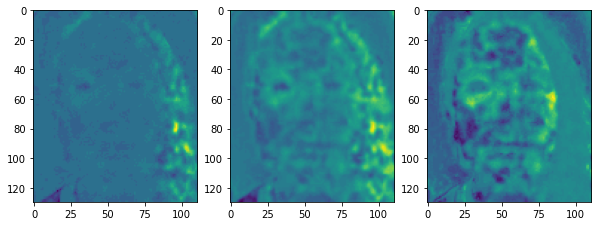

In [11]:
#What about LAB
low = adjust_exposure(chip, 0.1)
medium = adjust_exposure(chip, 1.0)
high = adjust_exposure(chip, 3.0)

low = cv2.cvtColor(low, cv2.COLOR_BGR2Lab)[:, :, 2]
medium = cv2.cvtColor(medium, cv2.COLOR_BGR2Lab)[:, :, 2]
high = cv2.cvtColor(high, cv2.COLOR_BGR2Lab)[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(low)
ax[1].imshow(medium)
ax[2].imshow(high)
plt.show()

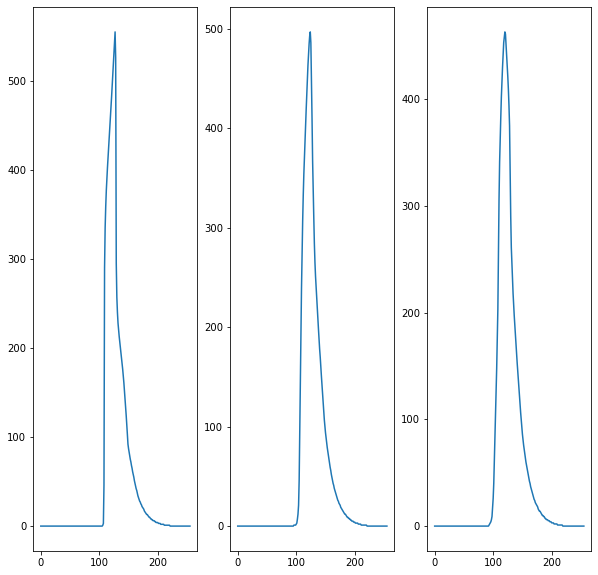

In [12]:
lowh = smooth_out(compute_hist(low, 256), window_size=20)
mediumh = smooth_out(compute_hist(medium, 256), window_size=20)
highh = smooth_out(compute_hist(high, 256), window_size=20)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].plot(lowh)
ax[1].plot(mediumh)
ax[2].plot(highh)
plt.show()